In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df = pd.read_csv('hcvdat0.csv')
df = df.dropna()
print(df.shape)
print(list(df.columns))

(589, 14)
['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
def findUnique(col):
  print("The number of unique values are "+ str(df[col].nunique()))
  print("The unique values are :")
  print( df[col].unique())

In [ ]:
findUnique('Category')
findUnique('Age')

The number of unique values are 5
The unique values are :
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
The number of unique values are 46
The unique values are :
[32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 76 77 74 23 25 27 29]


We try to identify any unique values during data preprocessing

In [ ]:
df['Category']=np.where(df['Category'] =='0=Blood Donor', 'Blood Donor', df['Category'])
df['Category']=np.where(df['Category'] =='0s=suspect Blood Donor', 'Suspected Blood Donor', df['Category'])
df['Category']=np.where(df['Category'] =='1=Hepatitis', 'Hepatitis', df['Category'])
df['Category']=np.where(df['Category'] =='2=Fibrosis', 'Fibrosis', df['Category'])
df['Category']=np.where(df['Category'] =='3=Cirrhosis', 'Cirrhosis', df['Category'])

We change the input values to make it more Readable

In [ ]:
stringValues = ["Sex"]
for i in stringValues:
  # get all unique values in a list. Index of each 
  uniqueList = list(set(df[i]))
  # Create replace dictionary with key as string to be replaced and value as integer encoding for the string
  replaceDict = {}
  for j in range(len(uniqueList)):
    replaceDict[uniqueList[j]] = j
  df = df.replace({i : replaceDict})
  df

We change Gender values into Numerical format for taking it as the sole class attribute

In [ ]:
findUnique('Category')
findUnique('Sex')

The number of unique values are 5
The unique values are :
['Blood Donor' 'Suspected Blood Donor' 'Hepatitis' 'Fibrosis' 'Cirrhosis']
The number of unique values are 2
The unique values are :
[0 1]


In [ ]:
df['Sex'].value_counts()

0    363
1    226
Name: Sex, dtype: int64

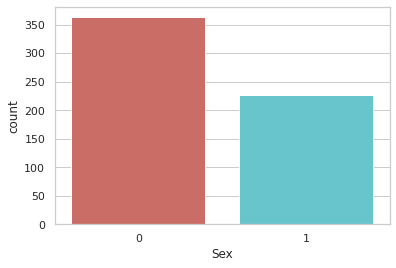

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x=df.Sex,palette='hls')
plt.show()
plt.savefig('count_plot')

We try to observe the ration of the Sex Values

We try to Understand how different mean values of other attributes are distributed across various types in Sex, Category and each age group in Age

In [ ]:
df.groupby('Sex').mean()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Sex,,,,,,,,,,,,
0,211.438017,47.305785,42.306061,67.967769,29.48843,37.138292,12.501102,8.517410,5.364242,87.986777,43.684298,72.072727
1,438.725664,47.597345,40.529204,68.372566,21.89646,28.367257,8.636283,7.699646,5.434867,71.521681,29.387168,71.596903


In [ ]:
df.groupby('Category').mean()

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,,,,,,,,,,,,,
Blood Donor,265.71673,47.174905,0.397338,42.188023,68.163308,26.803612,26.517871,8.570152,8.386464,5.494316,79.159696,29.097909,72.096008
Cirrhosis,600.50000,54.291667,0.333333,31.958333,93.220833,8.129167,114.695833,60.500000,3.428333,3.918333,155.195833,135.591667,69.062500
Fibrosis,573.50000,49.666667,0.333333,43.000000,37.841667,19.300000,88.383333,14.166667,8.440833,4.792500,69.858333,68.383333,74.841667
Hepatitis,554.20000,40.650000,0.200000,43.600000,41.405000,20.635000,81.675000,16.350000,9.236500,5.139000,73.505000,102.900000,74.390000
Suspected Blood Donor,537.00000,57.571429,0.142857,24.400000,107.300000,102.114286,71.000000,4.685714,7.480000,4.451429,61.714286,151.514286,53.914286


In [ ]:
df.groupby('Age').mean()

,Unnamed: 0,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,,,,,,,,,,,,
23,543.000000,0.000000,47.000000,19.100000,38.900000,164.200000,17.000000,7.090000,3.200000,79.300000,90.400000,70.100000
25,544.000000,0.000000,42.000000,38.200000,63.300000,187.700000,14.000000,6.000000,4.280000,66.900000,40.200000,70.500000
27,545.000000,0.000000,45.000000,27.500000,10.500000,37.800000,10.000000,8.770000,3.200000,55.200000,35.900000,74.500000
29,565.000000,0.000000,41.000000,43.100000,2.400000,83.500000,6.000000,11.490000,5.420000,55.200000,130.000000,66.500000
32,132.812500,0.187500,42.781250,54.212500,22.487500,31.112500,12.462500,8.110000,4.631875,79.037500,27.956250,73.256250
33,195.625000,0.541667,41.025000,64.850000,22.045833,25.404167,8.166667,7.572083,4.830417,75.533333,20.783333,71.908333
34,170.052632,0.368421,41.857895,56.010526,29.594737,27.426316,9.447368,8.504737,5.062632,80.436842,26.184211,71.542105
35,210.047619,0.476190,44.314286,70.085714,26.242857,25.819048,9.257143,9.265714,5.055714,76.580952,27.433333,74.057143
36,189.562500,0.312500,45.081250,60.956250,32.306250,35.256250,8.906250,8.383125,5.256250,79.618750,26.793750,74.718750


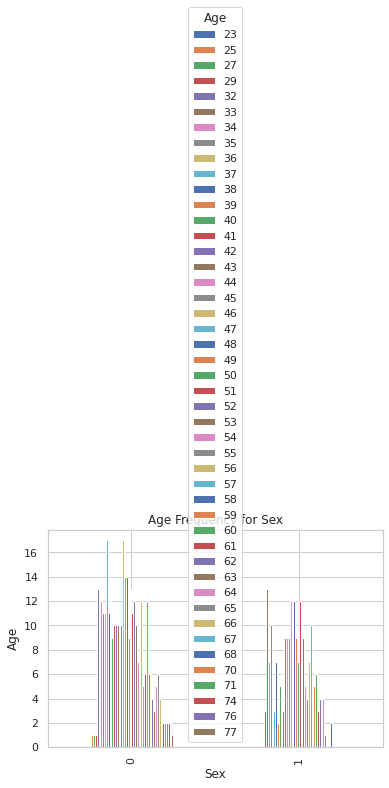

In [ ]:
%matplotlib inline
pd.crosstab(df.Sex,df.Age).plot(kind='bar')
plt.title('Age Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.savefig('svag')

We try to see if Age is a Good Predictor variable but according to the graph above , it is a bit more complex

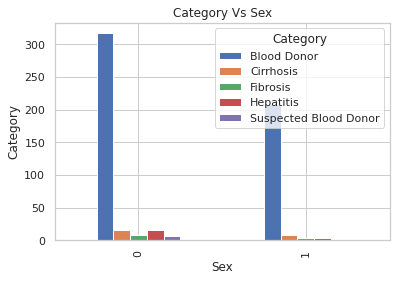

In [ ]:
%matplotlib inline
pd.crosstab(df.Sex,df.Category).plot(kind='bar')
plt.title('Category Vs Sex')
plt.xlabel('Sex')
plt.ylabel('Category')
plt.savefig('svcat')

We check distribution of various categories in Sex

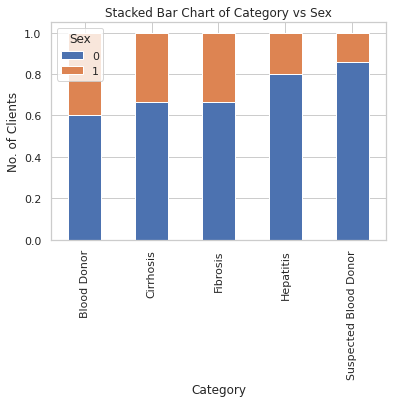

In [ ]:
table=pd.crosstab(df.Category,df.Sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Category vs Sex')
plt.xlabel('Category')
plt.ylabel('No. of Clients')
plt.savefig('categvsex')

It seems that Category can be a good predictor variable

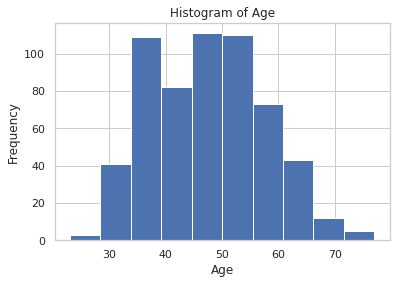

In [ ]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

To see distribution of Age across Each age Group

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,Cirrhosis,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,Cirrhosis,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,Cirrhosis,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,Cirrhosis,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
stringValues = ["Category"]
for i in stringValues:
  # get all unique values in a list. Index of each 
  uniqueList = list(set(df[i]))
  # Create replace dictionary with key as string to be replaced and value as integer encoding for the string
  replaceDict = {}
  for j in range(len(uniqueList)):
    replaceDict[uniqueList[j]] = j
  df = df.replace({i : replaceDict})
  df

We convert all values in Category to a numerical format

In [ ]:
findUnique('Category')

The number of unique values are 5
The unique values are :
[0 3 2 1 4]


In [ ]:
X = df.iloc[:, [1,2,4,5,6,7,8,9,11,10,12,13]].values
y = df.iloc[:, 3].values

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False  True  True  True False  True]
[1 7 1 5 2 4 3 1 1 1 6 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


We perform a Feature Check by RFE and eliminate any False categorized features

In [ ]:
X = df.iloc[:, [1,8,9,11,10,13]].values
y = df.iloc[:, 3].values

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.567343
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  589
Model:                          Logit   Df Residuals:                      583
Method:                           MLE   Df Model:                            5
Date:                Wed, 07 Sep 2022   Pseudo R-squ.:                  0.1479
Time:                        05:27:15   Log-Likelihood:                -334.16
converged:                       True   LL-Null:                       -392.18
Covariance Type:            nonrobust   LLR p-value:                 2.166e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2657      0.149     -1.779      0.075      -0.559       0.027
x2            -0.0218      0.

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.764


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[88 10]
 [37 42]]


we have 44+88 correct predictions and 35+10 incorrect predictions

In [ ]:
score = logreg.score(X_test, y_test)
print(score)

0.7344632768361582


The Accuracy is around 73.4

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        98
           1       0.81      0.53      0.64        79

    accuracy                           0.73       177
   macro avg       0.76      0.71      0.72       177
weighted avg       0.75      0.73      0.72       177



Atleast 75% of the Clients who had come for blood tests have recieved their preferred report and around 73% of them had correct Blood Test Results according to their Gender

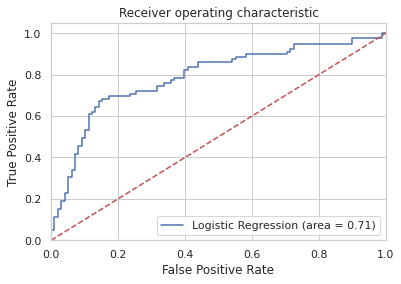

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#DECISION TREE

In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp 

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,4,58,1,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,4,59,1,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,4,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
features = ['Category','Age','GGT','PROT','AST']
x1 = df[features]
y1 = df['Sex']
f = plt.figure()
f.set_figwidth(200)
f.set_figheight(200)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x1, y1)

tree.plot_tree(dtree, feature_names=features)

[Text(0.2564986597065463, 0.9772727272727273, 'GGT <= 13.45\ngini = 0.473\nsamples = 589\nvalue = [363, 226]'),
 Text(0.04966139954853273, 0.9318181818181818, 'PROT <= 62.3\ngini = 0.375\nsamples = 96\nvalue = [24, 72]'),
 Text(0.040632054176072234, 0.8863636363636364, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.05869074492099323, 0.8863636363636364, 'PROT <= 78.9\ngini = 0.35\nsamples = 93\nvalue = [21, 72]'),
 Text(0.04966139954853273, 0.8409090909090909, 'AST <= 14.85\ngini = 0.33\nsamples = 91\nvalue = [19, 72]'),
 Text(0.03160270880361174, 0.7954545454545454, 'Age <= 35.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.022573363431151242, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.040632054176072234, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06772009029345373, 0.7954545454545454, 'AST <= 42.75\ngini = 0.312\nsamples = 88\nvalue = [17, 71]'),
 Text(0.05869074492099323, 0.75, 'GGT <= 9.85\ngini = 0.3\nsamples = 87\nvalue = [16, 71]'),
 Te

In [ ]:
x= df.iloc[:, [13,12]].values
y= df.iloc[:, 3].values

We take PROT and GGT in x and Sex in y

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[64, 18],
       [44, 22]])

The 22+64 =86 is relatively moderate compared to other values

TRAIN VISUALIZATION

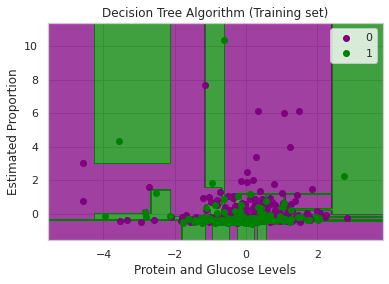

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i,j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
  c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm (Training set)')  
mtp.xlabel('Protein and Glucose Levels')  
mtp.ylabel('Estimated Proportion')  
mtp.legend()  
mtp.show()

TEST VISUALIZATION

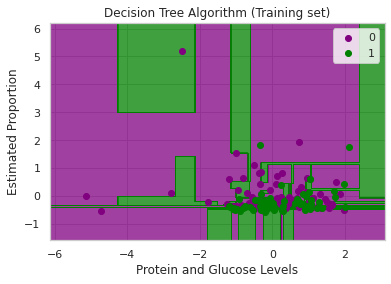

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i,j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
  c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Decision Tree Algorithm (Training set)')  
mtp.xlabel('Protein and Glucose Levels')  
mtp.ylabel('Estimated Proportion')  
mtp.legend()  
mtp.show()  

Due to there not being a wide enough difference between correct and incorrect values we see a lot of the Green and Purple spots in areas they should not be.